<a href="https://colab.research.google.com/github/adams-gc/BF-python-class/blob/main/Text_classification__logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the packags
# pip install --user -U nltk
# pip install -U scikit-learn
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
1951,business,christmas sales worst since 1981 uk retail sal...
1642,sport,teenager tait picked for england newcastle s t...
250,sport,wenger handed summer war chest arsenal boss ar...
1050,entertainment,tough schedule delays elliot show preview perf...
505,sport,gallas sees two-horse race chelsea s william g...
...,...,...
2073,sport,koubek suspended after drugs test stefan koube...
1386,sport,adriano s chelsea link rejected adriano s agen...
217,sport,hewitt falls to dent in adelaide lleyton hewit...
646,tech,gritty return for prince of persia still baski...


In [30]:
df.isnull().sum()

,0
category,0
text,0
cleaned,0


In [ ]:
#No of a categories
len(set(df['category']))

5

In [ ]:
df.groupby('category').category.count()

,category
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


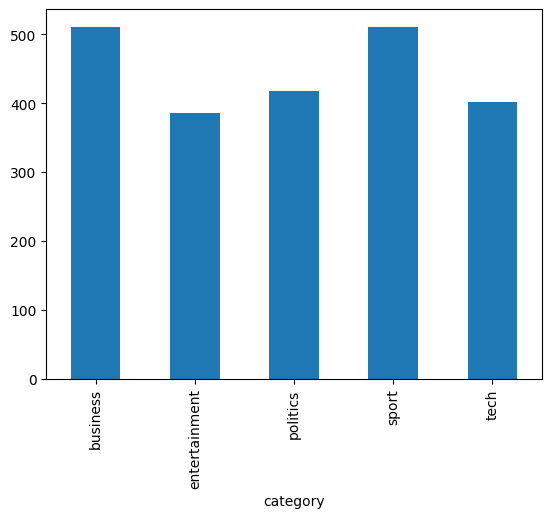

In [ ]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [ ]:
len(df['text'][0].split())

737

In [ ]:
#Data Preprocessing

In [ ]:
data = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text'].iloc[0:1]]
data

['christmas sales worst since      uk retail sales fell in december  failing to meet expectations and making it by some counts the worst christmas since        retail sales dropped by    on the month in december  after a      rise in november  the office for national statistics  ons  said  the ons revised the annual      rate of growth down from the      estimated in november to       a number of retailers have already reported poor figures for december  clothing retailers and non specialist stores were the worst hit with only internet retailers showing any significant growth  according to the ons   the last time retailers endured a tougher christmas was    years previously  when sales plunged        the ons echoed an earlier caution from bank of england governor mervyn king not to read too much into the poor december figures  some analysts put a positive gloss on the figures  pointing out that the non seasonally adjusted figures showed a performance comparable with       the november 

In [ ]:
re.sub("[^a-zA-Z]", " ", "Hello World.")

'Hello World '

In [ ]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing I have a Computer".split()
# " ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
data

['I', 'am', 'loving', 'computing', 'I', 'have', 'a', 'Computer']

In [ ]:
for i in data:
  print(stemmer.stem(i))

i
am
love
comput
i
have
a
comput


In [ ]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")

'i am love comput'

In [ ]:
# Data Cleaning removing stopwords

In [ ]:
news = ''
data = "I am loving computing I have a Computer".lower().split()
for i in data:
  if i not in words:
    news = news + " " +i
news
  # print(i)

' loving computing computer'

In [ ]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [ ]:
words = stopwords.words("english")
x = df['text'][0].split()
" ".join([i for i in x if i not in words])


'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming. people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms a

In [ ]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]
df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,category,text
1951,business,christmas sales worst since uk retail sales fe...
1642,sport,teenager tait picked england newcastle teenage...
250,sport,wenger handed summer war chest arsenal boss ar...
1050,entertainment,tough schedule delays elliot show preview perf...
505,sport,gallas sees two horse race chelsea william gal...
...,...,...
2073,sport,koubek suspended drugs test stefan koubek says...
1386,sport,adriano chelsea link rejected adriano agent gi...
217,sport,hewitt falls dent adelaide lleyton hewitt suff...
646,tech,gritty return prince persia still basking rela...


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [ ]:
df.to_csv('cleaned_bbc_data.csv')

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [ ]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['text']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)


# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

# svc_pipeline = Pipeline([
#     ('bow', CountVectorizer()),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])
# svc_pipeline.fit(X_train, y_train)

In [ ]:
X_test

,text
1363,calder fears scottish rugby former scotland in...
961,stars shine bafta red carpet hollywood stars b...
1275,could yukos blessing disguise things equal not...
1175,director nair vanity project indian film direc...
118,chelsea denied james heroics brave defensive d...
...,...
1742,technology gets creative bug hi tech arts worl...
68,microsoft gets blogging bug software giant mic...
1873,bank voted rate change decision keep interest ...
466,healey targets england comeback leicester wing...


In [ ]:
y_test

,category
1363,sport
961,entertainment
1275,business
1175,entertainment
118,sport
...,...
1742,tech
68,tech
1873,business
466,sport


In [ ]:
#Test Accuracy of Logistic regression
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9640718562874252


In [ ]:
#Train Accuracy of Logistic regression
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_train)
# print(predict_news_cat)
print(accuracy_score(y_train,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9862506610259122


In [ ]:
#Test Accuracy of SVC
from sklearn.metrics import accuracy_score
predict_news_cat = svc_pipeline.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

#Train Accuracy of SVC
from sklearn.metrics import accuracy_score
predict_news_cat = svc_pipeline.predict(X_train)
# print(predict_news_cat)
print(accuracy_score(y_train,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9670658682634731
1.0


In [ ]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
# news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = Prime Minister KP Sharma Oli has returned home after concluding his four-official visit to China.  The Nepali delegation led by PM Oli arrived in Kathmandu on a chartered Himalayan Airlines flight on Thursday afternoon.  A press conference is being organized at the Tribhuvan International Airport in Kathmandu to brief the media on the China visit.  PM Oli had left for China on Monday for his first official foreign trip since taking office. He held talks with Chinese President Xi Jinping in Beijing on Tuesday.  During the visit, Nepal and China also signed various deals in the presence of PM Oli and his Chinese counterpart Li Qiang.
Predicted news category =  business


In [ ]:
import pickle
load_model = pickle.load(open('LogisticRegression.pickle', 'rb'))
pred = load_model.predict(news_data_df['predict_news'])
pred

array(['business'], dtype=object)

In [ ]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

               precision    recall  f1-score   support

     business       0.97      1.00      0.99        67
entertainment       0.98      0.97      0.98        61
     politics       0.98      0.97      0.98        61
        sport       0.92      1.00      0.96        81
         tech       0.98      0.88      0.93        64

     accuracy                           0.96       334
    macro avg       0.97      0.96      0.96       334
 weighted avg       0.97      0.96      0.96       334

[[67  0  1  0  1]
 [ 0 59  0  0  1]
 [ 0  1 59  0  0]
 [ 0  0  1 81  6]
 [ 0  1  0  0 56]]


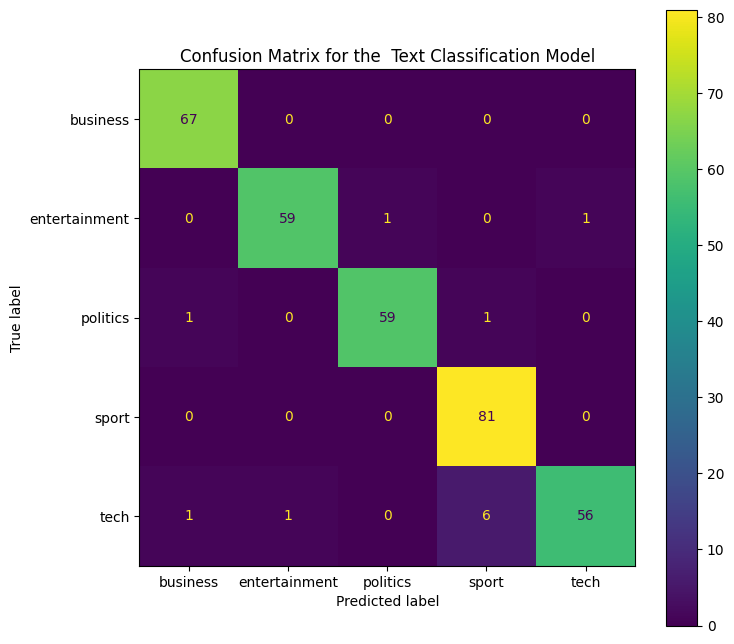

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model (Logistic regression classifier)')
# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

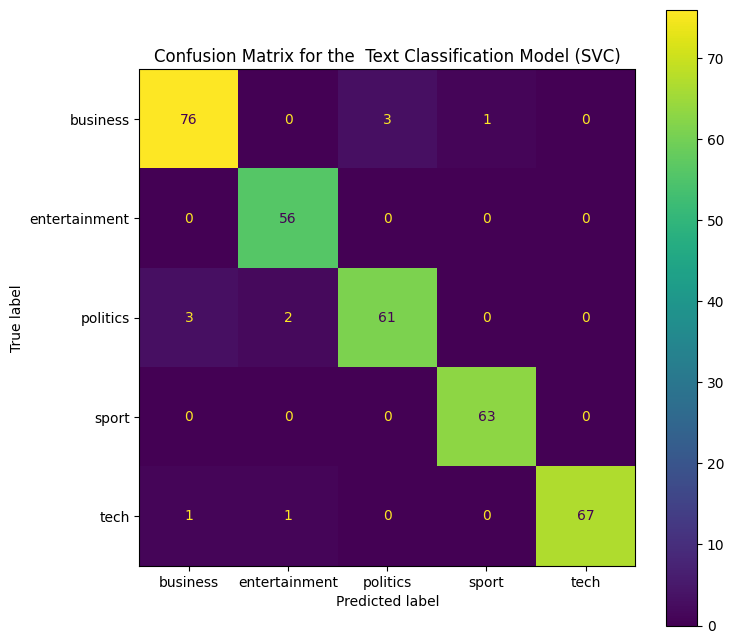

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,svc_pipeline.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model (SVC)')
# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);